In [1]:

#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the setting globally to display full float numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#Importing DataSet
df=pd.read_csv(r'Global_SuperStore.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


In [4]:
#Checking DataFrame Shape
df.shape

(51290, 24)

In [5]:
#Checking DataFrame Columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
#Checking Null Values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
#Dropping Null Values Column because it is not usefull and also having 75%+ null values
df.drop('Postal Code',axis=1,inplace=True)  # axis=1 => columns


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
#Checking Column Data Types
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [10]:
#Checking Duplicates
df.duplicated().sum()

0

In [11]:
#Extracting Categorical and Numerical Columns
Cat_cols=df.select_dtypes(include='object').columns
Num_cols=df.select_dtypes(exclude='object').columns
print("Categorcal Columns",Cat_cols)
print("Numerical Columns", Num_cols)

Categorcal Columns Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')
Numerical Columns Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')


1) Find Sub Category wise sum of Sales and depict it on a bar chart and depict highest and lowest shipping cost with different colors.

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [13]:
b1 = df.groupby(['Sub-Category'])['Sales'].sum()
b1

Sub-Category
Accessories    749237.02
Appliances    1011064.31
Art            372091.97
Binders        461911.51
Bookcases     1466572.24
Chairs        1501681.76
Copiers       1509436.27
Envelopes      170904.30
Fasteners       83242.32
Furnishings    385578.26
Labels          73404.03
Machines       779060.07
Paper          244291.72
Phones        1706824.14
Storage       1127085.86
Supplies       243074.22
Tables         757041.92
Name: Sales, dtype: float64

In [14]:
sc =  b1.index.tolist()
ssales = b1.values.tolist()
print(sc)
print(ssales)

['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']
[749237.0185, 1011064.305, 372091.9659, 461911.5057, 1466572.2418, 1501681.7642, 1509436.27328, 170904.3016, 83242.3159, 385578.2559, 73404.03, 779060.0671, 244291.7194, 1706824.1392, 1127085.8614, 243074.2206, 757041.9244]


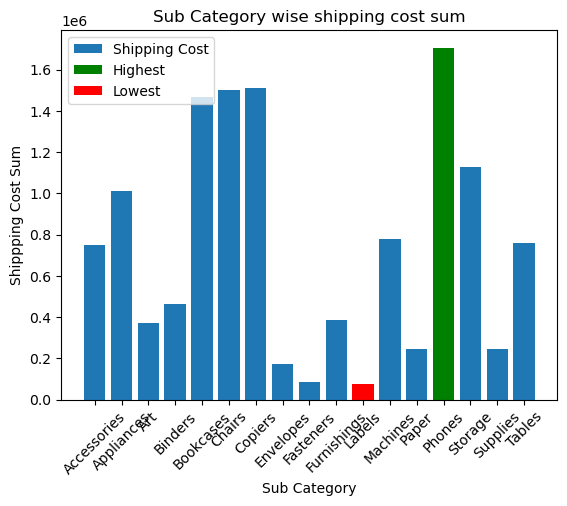

In [15]:
plt.bar(sc,ssales,label='Shipping Cost')
plt.bar(sc[ssales.index(max(ssales))],max(ssales),color='green',label='Highest')
plt.bar(sc[ssales.index(min(ssales))],min(ssales),color='red',label='Lowest')
plt.title('Sub Category wise shipping cost sum')
plt.xlabel('Sub Category')
plt.ylabel('Shippping Cost Sum')
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

In [16]:
#2) Find Segment wise mean of Sales and depict it on a pie chart.

In [17]:
b2 = df.groupby(['Segment'])['Sales'].mean()
b2

Segment
Consumer      245.42
Corporate     247.89
Home Office   247.23
Name: Sales, dtype: float64

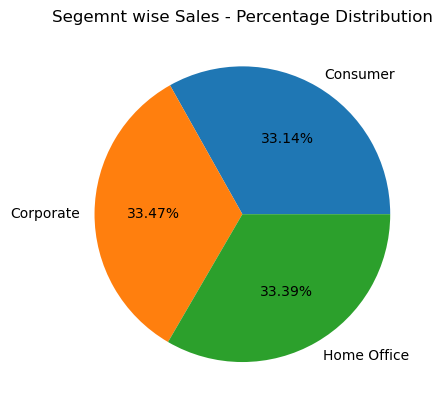

In [18]:
plt.pie(b2.values,labels=b2.index,autopct='%.2f%%')
plt.title('Segemnt wise Sales - Percentage Distribution')
plt.show()

In [19]:
#3) Find Category wise sum of profit and depict it on a bar chart and a pie chart

In [20]:
b3 = df.groupby('Category')['Profit'].sum()
b3

Category
Furniture         285204.72
Office Supplies   518473.83
Technology        663778.73
Name: Profit, dtype: float64

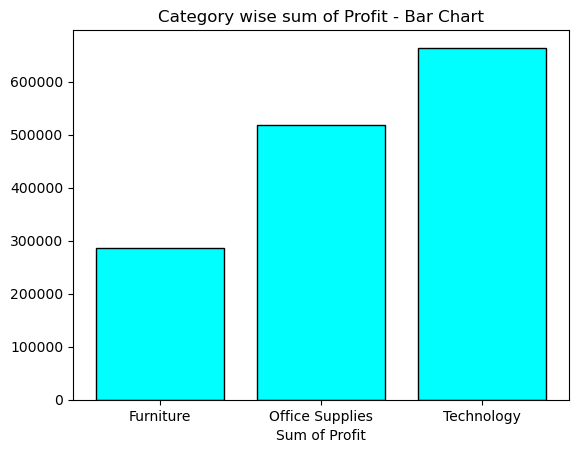

In [21]:
plt.bar(b3.index,b3.values,color='cyan',edgecolor='black')
plt.title('Category wise sum of Profit - Bar Chart')
plt.xlabel('Category')
plt.xlabel('Sum of Profit')
plt.show()

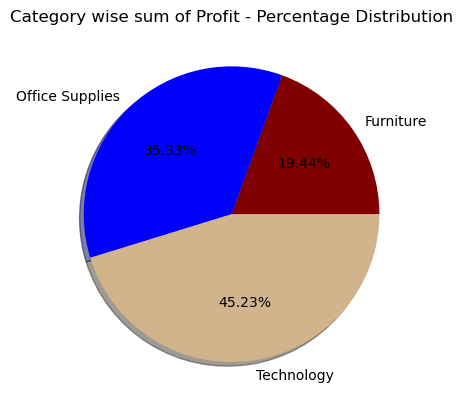

In [22]:
plt.pie(x=b3.values, labels=b3.index,colors=['maroon','blue','tan'],
        shadow=True,autopct='%.2f%%')
plt.title('Category wise sum of Profit - Percentage Distribution')
plt.show()

In [23]:
#4) Find Segment and Category wise sum of Sales and sum of profit and depict it on a clustered bar chart

In [24]:
b4 = df.groupby(['Segment','Category'])[['Sales','Profit']].sum()
print(type(b4))
b4

<class 'pandas.core.frame.DataFrame'>


Sales    Profit
Segment     Category                            
Consumer    Furniture       2128395.77 153734.39
            Office Supplies 1952513.64 253059.98
            Technology      2427040.01 342445.40
Corporate   Furniture       1264519.79  83731.92
            Office Supplies 1142386.38 167581.23
            Technology      1417791.36 189895.19
Home Office Furniture        717958.63  47738.41
            Office Supplies  692170.21  97832.62
            Technology       899726.13 131438.14

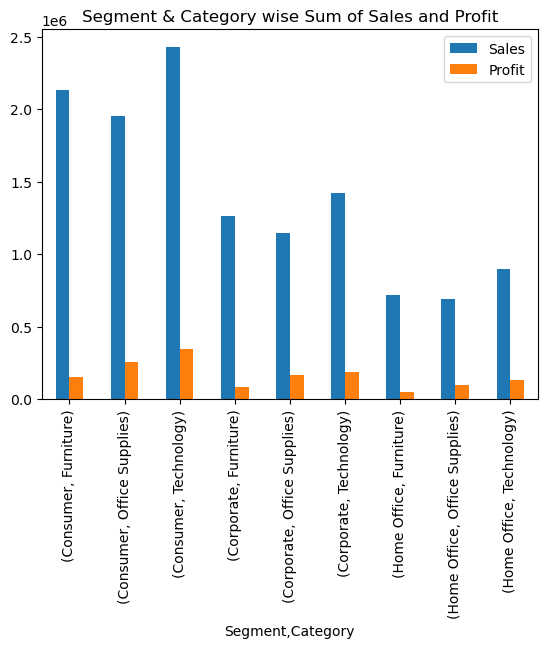

In [25]:
b4.plot(kind='bar')
plt.title('Segment & Category wise Sum of Sales and Profit')
plt.xticks(rotation=90)
plt.show()

In [26]:
#Q5) Depict Sales and Profit in a scatter chart based on Segment

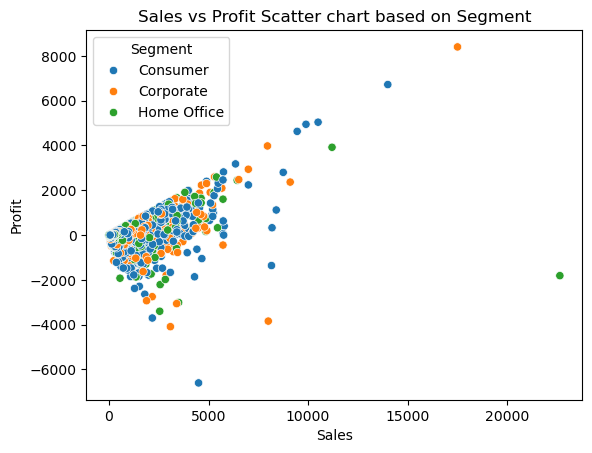

In [27]:
sns.scatterplot(x=df['Sales'],y=df['Profit'],hue=df['Segment'])
plt.title('Sales vs Profit Scatter chart based on Segment')
plt.show()

In [28]:
#6) Find sum of Profit and Shipping cost based on Sub Catgeory and display it on a Stacked bar chart

In [29]:
b6 = df.groupby(['Sub-Category'])[['Profit','Shipping Cost']].sum()
b6

,Profit,Shipping Cost
Sub-Category,,
Accessories,129626.31,83513.33
Appliances,141680.59,108300.59
Art,57953.91,41287.14
Binders,72449.85,48181.71
Bookcases,161924.42,155481.97
Chairs,140396.27,164229.35
Copiers,258567.55,159496.20
Envelopes,29601.12,18547.49
Fasteners,11525.42,9053.34


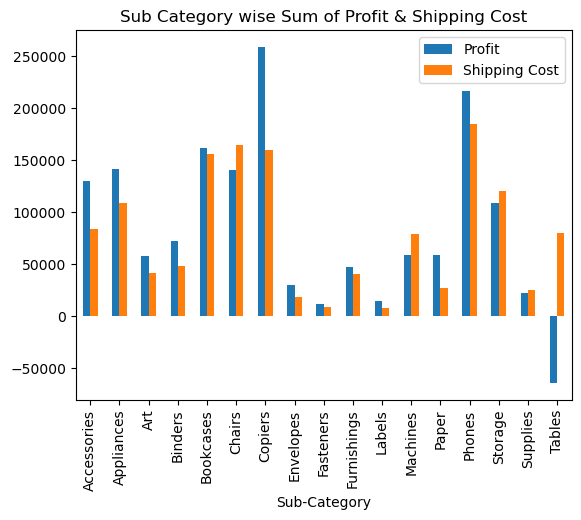

In [30]:
b6.plot(kind='bar')
plt.title('Sub Category wise Sum of Profit & Shipping Cost')
plt.show()

In [31]:
#Feature Engineering

In [32]:
#1) Create new columns Year, Quarter, Month and Day based on Order Date

In [33]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [36]:
# dt = datetime
df['Year'] = df['Order Date'].dt.year
df['Qtr'] = df['Order Date'].dt.quarter
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Qtr,Month,Day
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.65,7,0.00,762.18,933.57,Critical,2012,3,7,31
1,26341,IN-2013-77878,2013-02-05,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.39,9,0.10,-288.76,923.63,Critical,2013,1,2,5
2,25330,IN-2013-71249,2013-10-17,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.17,9,0.10,919.97,915.49,Medium,2013,4,10,17
3,13524,ES-2013-1579342,2013-01-28,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.51,5,0.10,-96.54,910.16,Medium,2013,1,1,28
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.96,8,0.00,311.52,903.04,Critical,2013,4,11,5


In [37]:
#EDA on Conditional/Filtered data

In [38]:
#Q1) Find Order Priority and Category wise sum of Profit and Sales for the Year 2014 and depcit it on a line chart and a bar chart

In [39]:
c1 = df[df['Year']==2014].groupby(['Order Priority','Category'])[['Sales','Profit']].sum()
c1

Sales    Profit
Order Priority Category                           
Critical       Furniture        85052.56   9378.68
               Office Supplies  96599.39  15107.07
               Technology      124422.26  19753.06
High           Furniture       445196.85  22687.81
               Office Supplies 380209.24  55363.12
               Technology      478685.75  68457.60
Low            Furniture        64724.59   4556.63
               Office Supplies  68876.07  13393.66
               Technology       62548.54   4920.15
Medium         Furniture       783081.69  52688.95
               Office Supplies 759966.81  96062.21
               Technology      950502.12 141797.04

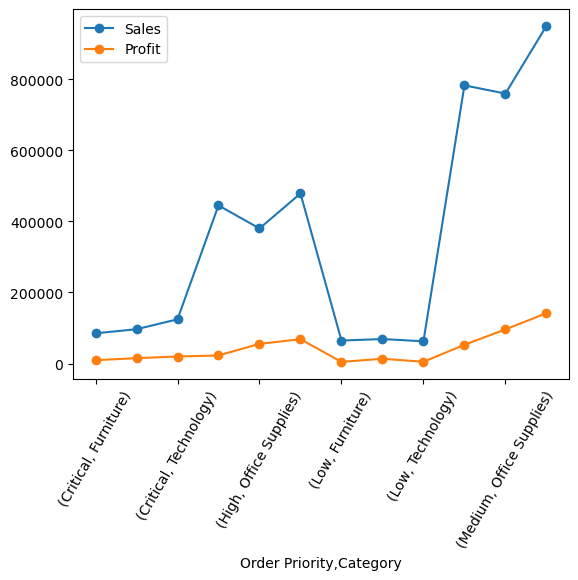

In [40]:
c1.plot(kind='line',marker='o')
plt.xticks(rotation=60)
plt.show()

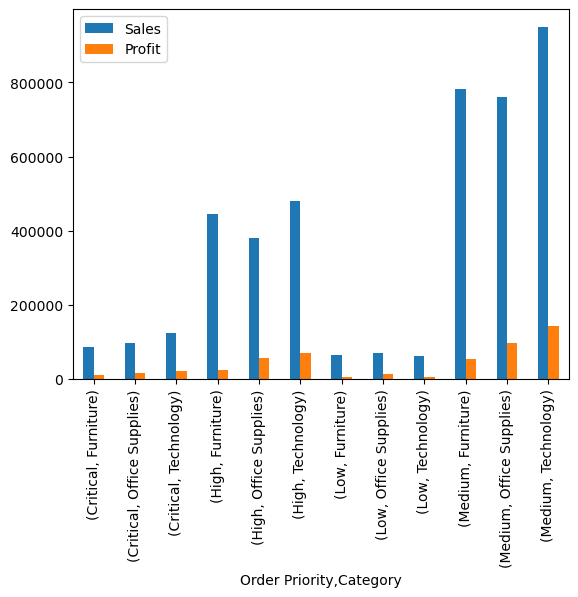

In [41]:
c1.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [42]:
#Q2) Find Segment and Order Priority and wise mean of Profit and mean of Sales for the month of December and depict in on a clustered bar chart

In [43]:
c2 = df[df['Month']==12].groupby(['Segment','Order Priority'])[['Profit','Sales']].mean()
c2

Profit  Sales
Segment     Order Priority               
Consumer    Critical         31.13 248.13
            High             23.59 270.52
            Low              20.53 185.53
            Medium           24.72 240.27
Corporate   Critical         42.47 276.34
            High             19.91 237.07
            Low              27.64 192.32
            Medium           24.93 260.45
Home Office Critical         56.05 300.77
            High             38.23 251.51
            Low              70.10 304.91
            Medium           35.10 255.15

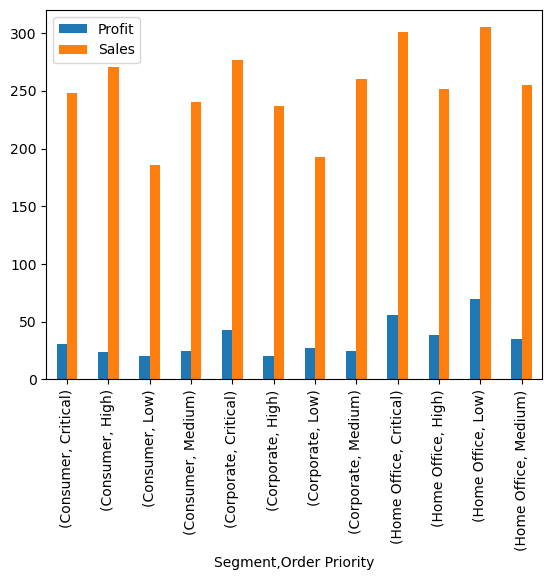

In [45]:
c2.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [46]:
#Q3) For the 'Corporate' Segment and 'Office Supplies' Category group the dataframe based on Year and find sum of Quantity, sum and mean of Discount, Max profit

In [49]:
c3 = df[(df['Category']=="Office Supplies") & (df['Segment']=="Corporate")].groupby(['Year']).agg(
{'Quantity':sum,'Discount':[sum,np.mean],'Profit':max})


/tmp/ipykernel_1537/12027420.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  c3 = df[(df['Category']=="Office Supplies") & (df['Segment']=="Corporate")].groupby(['Year']).agg(
/tmp/ipykernel_1537/12027420.py:1: FutureWarning: The provided callable <function mean at 0x7448d459a8e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  c3 = df[(df['Category']=="Office Supplies") & (df['Segment']=="Corporate")].groupby(['Year']).agg(
/tmp/ipykernel_1537/12027420.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "ma

In [50]:
#Q4) For the Order date between '2013-03-08' and between '2015-11-21', find the sum of Quantity, max discount, Mean Sales based on Category, Order Priority and Segment

In [51]:
c4 = df[df["Order Date"].between('2013-03-08','2015-11-21',inclusive=True)].groupby(['Category','Order Priority','Segment']).agg({'Quantity':sum,'Discount':max,'Sales':np.mean})
c4

ValueError: Inclusive has to be either string of 'both','left', 'right', or 'neither'.

In [52]:
#Q5) For the Category Technology or Furniture and for the Quarter 4, depict Quantity vs segment on a boxplot

In [53]:
df['Qtr'].value_counts()

Qtr
4    17134
3    14219
2    12135
1     7802
Name: count, dtype: int64

In [54]:
c5 = df[(df['Category'].isin(['Technology','Furniture'])) & (df['Qtr']==4)]
c5.shape

(6871, 27)

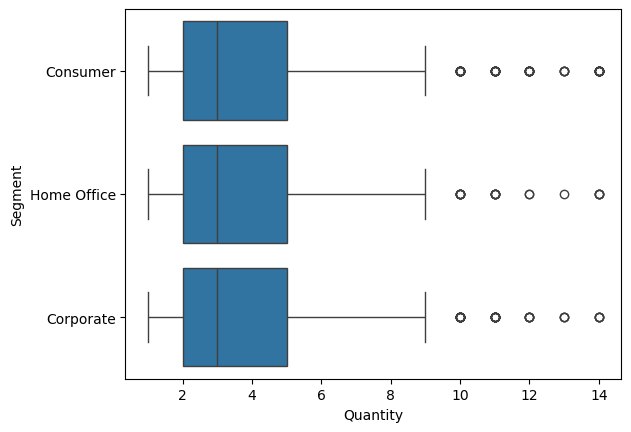

In [55]:
sns.boxplot(x=c5['Quantity'],y=c5['Segment'])
plt.show()

In [56]:
#6) EDA using Subplots

In [57]:
Q1) For 'Consumer' Segment and 'Medium' Order Priority, find Ship Mode wise mean of Sales and Profit
Create a 2x2 subplot depicting
a) Bar Chart and Line chart for Ship Mode vs Sales
b) Bar Chart and Line chart for Ship Mode vs Profit
c) Scatter Chart for Profit vs Sales
d) Line Chart for Ship Mode vs Profit and Ship Mode vs Sales

SyntaxError: unmatched ')' (3129820180.py, line 1)

In [58]:
d1 = df[(df['Segment']=='Consumer') & (df['Order Priority']=='Medium')].groupby(['Ship Mode'])[['Sales','Profit']].mean()
d1

,Sales,Profit
Ship Mode,,
First Class,250.84,33.15
Same Day,247.10,38.28
Second Class,236.49,26.30
Standard Class,245.59,29.23


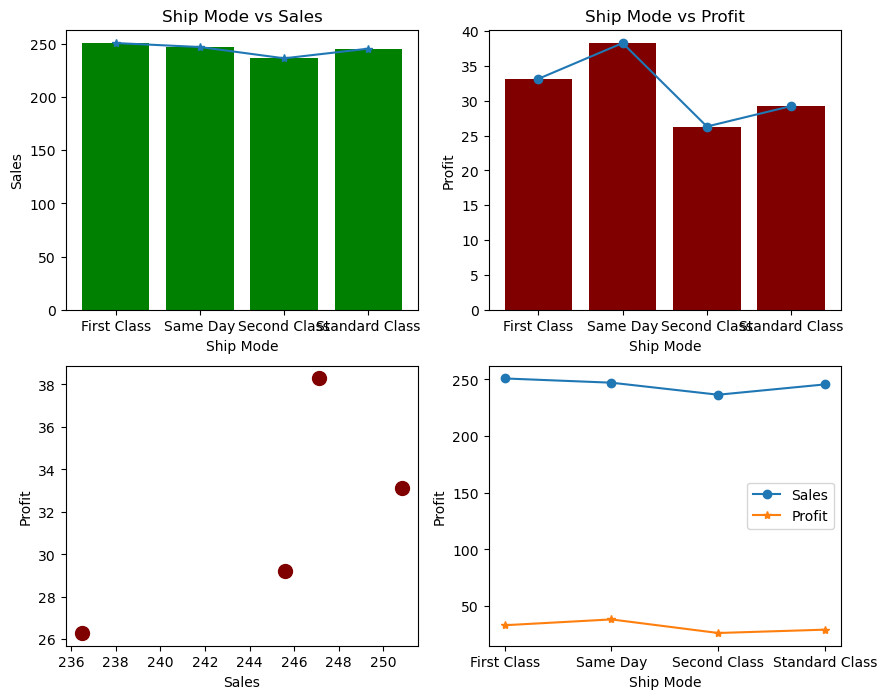

In [59]:
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(10,8))

ax1.bar(d1.index,d1['Sales'],color='green')  # Bar chart for Sales vs Ship Mode
ax1.plot(d1.index,d1['Sales'],marker='*')    # Line chart for Sales vs Ship Mode
ax1.set_xlabel('Ship Mode')
ax1.set_ylabel('Sales')
ax1.set_title('Ship Mode vs Sales')

ax2.bar(d1.index,d1['Profit'],color='maroon')  # Bar chart for Profit vs Ship Mode
ax2.plot(d1.index,d1['Profit'],marker="o")     # Line chart for Profit vs Ship Mode
ax2.set_xlabel('Ship Mode')
ax2.set_ylabel('Profit')
ax2.set_title('Ship Mode vs Profit')

ax3.scatter(d1['Sales'],d1['Profit'],marker='o',s=100,color='maroon')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Profit')


ax4.plot(d1.index,d1['Sales'],marker="o",label="Sales")      # Line chart for Sales vs Ship Mode
ax4.plot(d1.index,d1['Profit'],marker="*",label="Profit")   # Line chart for Profit vs Ship Mode
ax4.legend()
ax4.set_xlabel('Ship Mode')
ax4.set_ylabel('Profit')

plt.show()